<a href="https://colab.research.google.com/github/Rembarandt/UAS-ANALITIKA-DATA-GERALD/blob/main/3333210088_UAS_Analitika_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime
%matplotlib inline

**Import Dataset**

Dataset source : https://www.kaggle.com/datasets/varpit94/ford-stock-data

# https://drive.google.com/file/d/1uokFJ_QVdH6klztBzMLzP1btXXKEoWnj/view?usp=drive_link

!gdown 1uokFJ_QVdH6klztBzMLzP1btXXKEoWnj


Downloading...
From: https://drive.google.com/file/d/1uokFJ_QVdH6klztBzMLzP1btXXKEoWnj/view?usp=drive_link
To: /content/F.csv

  

In [ ]:
train_data = pd.read_csv('/content/F.csv')
train_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1972-06-01,0.000000,2.173495,2.149165,2.153220,0.115848,1091238
1,1972-06-02,2.153220,2.173495,2.141055,2.149165,0.115630,1174468
2,1972-06-05,2.149165,2.169440,2.141055,2.149165,0.115630,5209582
3,1972-06-06,2.149165,2.157275,2.116725,2.124835,0.114321,1424158
4,1972-06-07,2.124835,2.137000,2.112670,2.112670,0.113666,675088


Check missing values

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12563 entries, 0 to 12562
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       12563 non-null  object 
 1   Open       12563 non-null  float64
 2   High       12563 non-null  float64
 3   Low        12563 non-null  float64
 4   Close      12563 non-null  float64
 5   Adj Close  12563 non-null  float64
 6   Volume     12563 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 687.2+ KB


Check statistic vales for every features

In [ ]:
train_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,12563.000000,12563.000000,12563.000000,12563.000000,12563.000000,1.256300e+04
mean,9.358873,9.478265,9.229561,9.352563,5.341977,2.205999e+07
std,7.091861,7.193142,6.991138,7.088909,4.979011,3.109448e+07
min,0.000000,0.648804,0.638667,0.643736,0.059245,2.990110e+05
25%,2.607890,2.638303,2.570888,2.600287,0.294043,4.345223e+06
50%,8.895718,8.986956,8.790000,8.895718,4.501335,8.849370e+06
75%,12.560000,12.700000,12.408386,12.560000,9.198862,3.003010e+07
max,36.819485,37.300335,35.720394,36.647751,25.061152,5.411756e+08


Handle datetime data for time series

In [ ]:
train_data['Date'] = pd.to_datetime(train_data['Date'])
train_data.set_index('Date', inplace=True)
train_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1972-06-01,0.000000,2.173495,2.149165,2.153220,0.115848,1091238
1972-06-02,2.153220,2.173495,2.141055,2.149165,0.115630,1174468
1972-06-05,2.149165,2.169440,2.141055,2.149165,0.115630,5209582
1972-06-06,2.149165,2.157275,2.116725,2.124835,0.114321,1424158
1972-06-07,2.124835,2.137000,2.112670,2.112670,0.113666,675088


**EXPLORATORY DATA ANALYSIS**

Now let’s visualise the Adjusted Close (Stock Price when market closed)

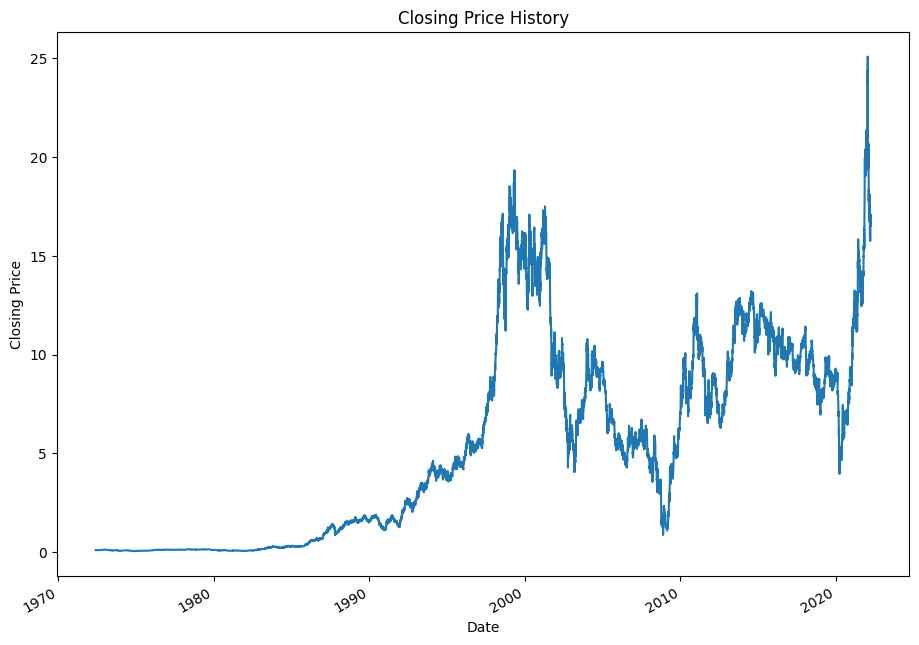

In [ ]:
plt.figure(figsize=(11, 8)) # resizing the plot
train_data['Adj Close'].plot()
plt.title('Closing Price History') # adding a title
plt.xlabel('Date') # x label
plt.ylabel('Closing Price') # y label
plt.show()

<Figure size 1600x800 with 0 Axes>

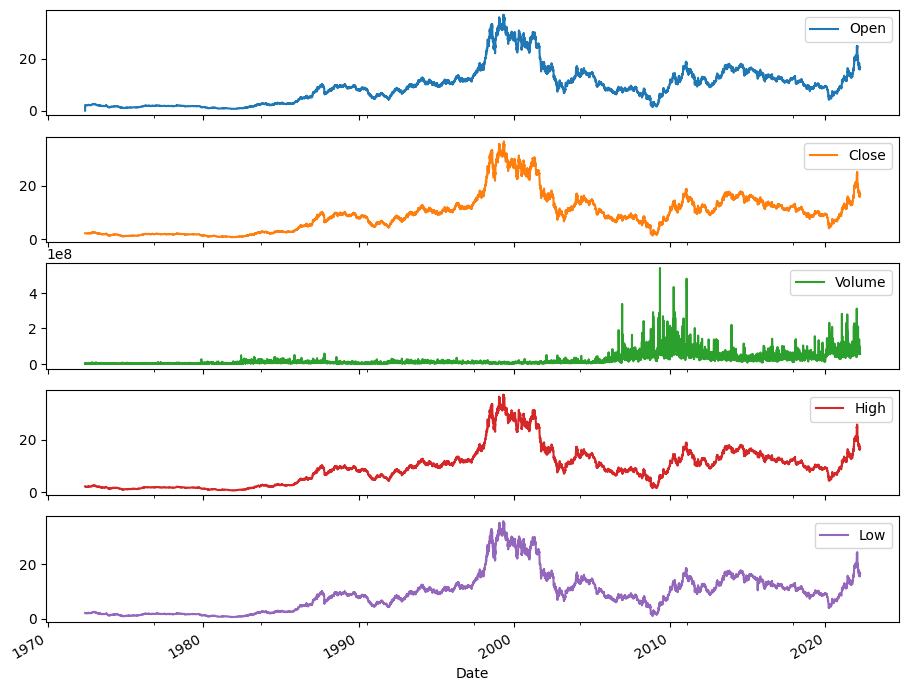

In [ ]:
plt.figure(figsize=(16, 8)) # resizing the plot
cols = ['Open', 'Close', 'Volume', 'High', 'Low']
axes = train_data[cols].plot(figsize=(11, 9), subplots = True)
plt.show()

In [ ]:
train_data['HL_PCT'] = (train_data['High'] - train_data['Low']) / train_data['Low'] * 100.0
train_data['PCT_change'] = (train_data['Close'] - train_data['Open']) / train_data['Open'] * 100.0

In [ ]:
df = train_data[['HL_PCT', 'PCT_change', 'Adj Close','Volume']]

In [ ]:
forecast_out = int(math.ceil(0.05 * len(df))) # forcasting out 5% of the entire dataset
print(forecast_out)
df['label'] = df['Adj Close'].shift(-forecast_out)

629


<ipython-input-11-8a15e8de9d0b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df['Adj Close'].shift(-forecast_out)


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error

It’s clear from the plot that there is an overall increase in the trend,with some seasonality in it.

In [ ]:
X_Predictions = X[-forecast_out:] # data to be predicted
X = X[:-forecast_out] # data to be trained

In [ ]:
df.dropna(inplace=True)
y = np.array(df['label'])

<ipython-input-15-c3da9adb30d1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
last_date = df.index[-1] #getting the lastdate in the dataset
last_unix = last_date.timestamp() #converting it to time in seconds
one_day = 86400 #one day equals 86400 seconds
next_unix = last_unix + one_day # getting the time in seconds for the next day
forecast_set = rf.predict(X_Predictions) # predicting forecast data
df['Forecast'] = np.nan
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

<ipython-input-25-3eb2aa88d409>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Forecast'] = np.nan
<ipython-input-25-3eb2aa88d409>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]
<ipython-input-25-3eb2aa88d409>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[next_date] = [np.nan for _ in range(len

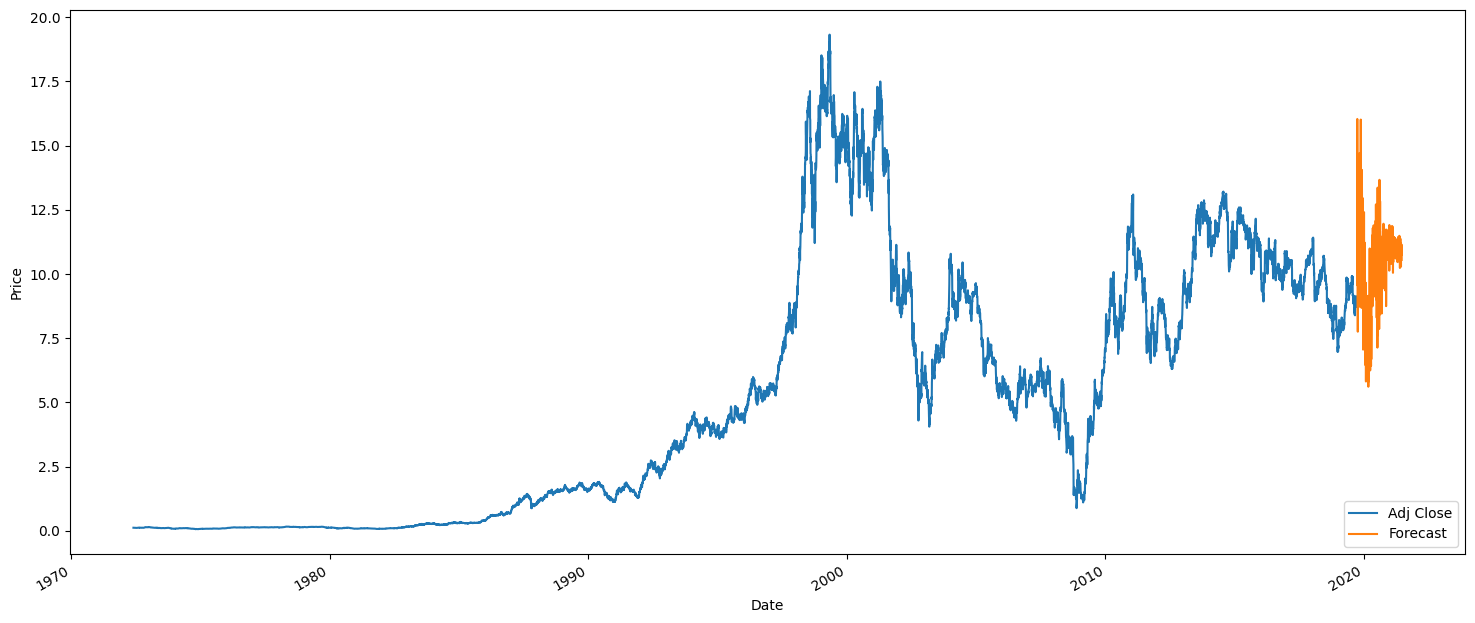

In [ ]:
plt.figure(figsize=(18, 8))
df['Adj Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()